In [5]:
library(tidyverse)
library(caret)
library(glmnet)
library(dplyr)
library(psych) 
set.seed(1991)

ERROR: Error in library(psych): there is no package called 'psych'


In [6]:
CompoundAware_DecadeAware<-read.csv('CompoundAware_DecadeAware.csv',sep = '\t')

In [22]:
Y <- CompoundAware_DecadeAware %>% select(compound_mean) %>% scale(center = TRUE, scale = FALSE) %>% as.double()
X <- CompoundAware_DecadeAware %>% select(-c(1:8)) %>% as.matrix()

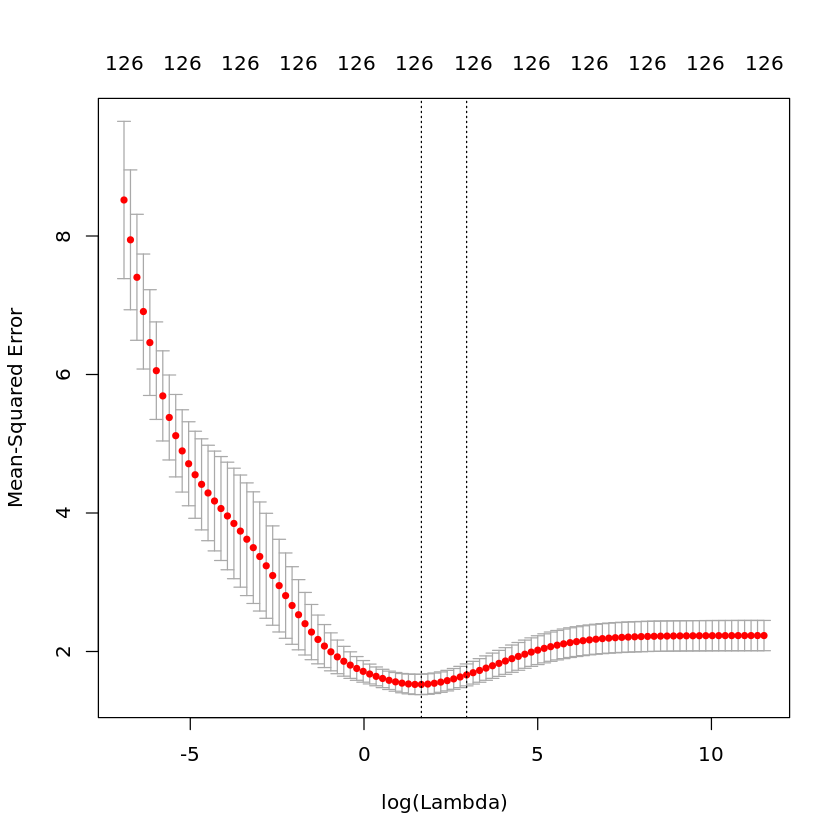

In [14]:
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
ridge_cv <- cv.glmnet(X, Y, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
# Plot cross-validation results
plot(ridge_cv)

In [15]:
lambda_cv <- ridge_cv$lambda.min
lambda_cv

[1] 5.214008

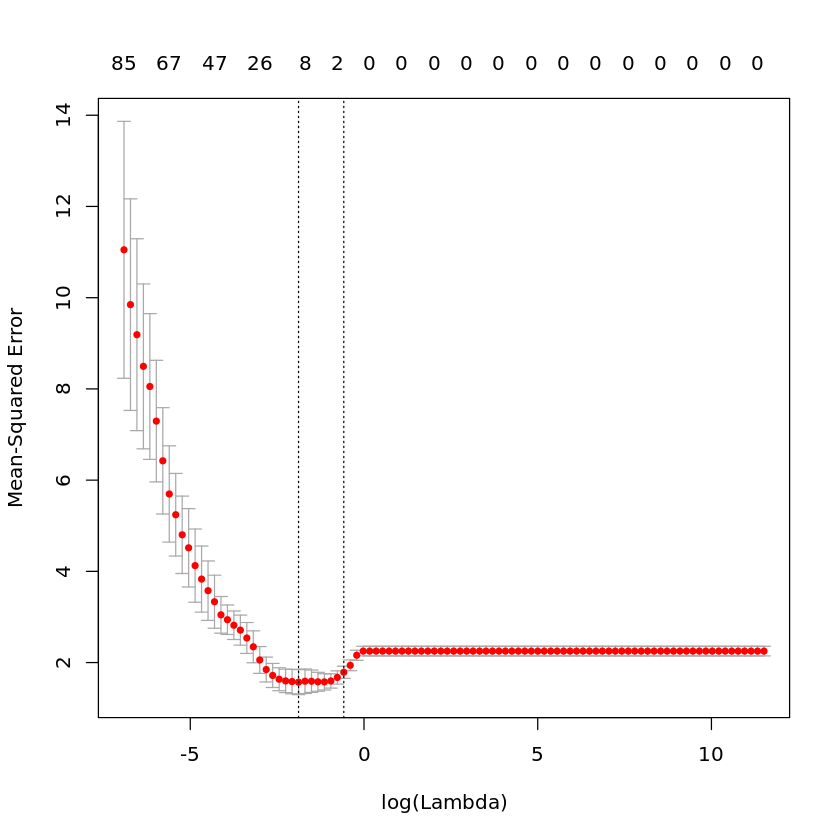

In [17]:
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 1 implements lasso regression
lasso_cv <- cv.glmnet(X, Y, alpha = 1, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
# Plot cross-validation results
plot(lasso_cv)

In [18]:
tmp_coeffs <- coef(lasso_cv, s = "lambda.min")
data.frame(name = tmp_coeffs@Dimnames[[1]][tmp_coeffs@i + 1], coefficient = tmp_coeffs@x)

name,coefficient
(Intercept),-0.52981112
X1900_local_mi,52.84186515
X2000_local_mi,4.32125329
X2000_log_ratio,0.01933272
X1840_ppmi,-0.48896538
X1850_ppmi,-0.08030321
X2000_ppmi,-1.73171318
X1980_sim_bw_constituents,12.51278296
X1810_sim_with_head,-0.17658979
X1830_sim_with_head,-0.22137774


In [34]:
predict(elastic_net_model, X)

ERROR: Error in eval(predvars, data, env): object 'modifier' not found
